In [2]:
import theano
import theano.tensor as T
import numpy as np

In [11]:
#Setting a Default Value for an Argument
x=T.scalar()
y=T.scalar()
f=x**y
func=theano.function(inputs=[x,theano.In(y,value=1)],outputs=f)
print func(3)
print func(3,2)

x,y,w=T.scalars('x','y','z')
f=theano.function(inputs=[x,theano.In(y,value=2),theano.In(w,name='w',value=3)],outputs=x**y**w)
print f(2)
print f(2,1)
print f(2,2,1)
print f(2,w=2)

3.0
9.0
256.0
2.0
4.0
16.0


In [24]:
#shared
st=theano.shared(0)
inc=T.iscalar()
acc=theano.function([inc],st,updates={st:st+inc})
print st.get_value()
print acc(2)
print st.get_value()
print acc(100)
print st.get_value()

0
0
2
2
102


In [41]:
#ignore value of shared var:
fn=st**2+inc
foo=T.scalar(dtype='int64')
skip=theano.function([inc,foo],fn,givens=[(st,foo)])
print st.get_value()
print skip(2,3)
print st.get_value()


102
11
102


In [47]:
#copying
new_st=theano.shared(0)
new_acc=acc.copy(swap={st:new_st})
print new_st.get_value()
print st.get_value()
print new_acc(2)
print new_st.get_value()
print st.get_value()

0
102
[array(0)]
2
102


In [71]:
#random
from theano.tensor.shared_randomstreams import RandomStreams
srng = RandomStreams(seed=234)
u=srng.normal((2,2))
r=srng.uniform((2,2))
f=theano.function([],u)
g=theano.function([],r,no_default_updates=True)
near_zeros=theano.function([],u+u-2*u)
print f()
print f()
print g()
print g()
print g()
print near_zeros()
print f()+f()-2*f()

[[-0.26708242 -1.99332322]
 [-0.46045026 -1.49765596]]
[[-1.67084079 -0.43006511]
 [-0.20102807 -1.11585479]]
[[ 0.12309219  0.71399385]
 [ 0.14249561  0.36686867]]
[[ 0.12309219  0.71399385]
 [ 0.14249561  0.36686867]]
[[ 0.12309219  0.71399385]
 [ 0.14249561  0.36686867]]
[[ 0.  0.]
 [ 0.  0.]]
[[-3.19000705  1.02637311]
 [-0.27235167  2.15622891]]


In [79]:
rval=u.rng.get_value(borrow=True)
print rval.normal()

0.554946924194


In [107]:
x=T.dscalar('x')
y=x**2
gy=T.grad(y,x)
print theano.pp(gy)
f=theano.function([x],gy)

((fill((x ** TensorConstant{2}), TensorConstant{1.0}) * TensorConstant{2}) * (x ** (TensorConstant{2} - TensorConstant{1})))


In [99]:
theano.pp(f.maker.fgraph.outputs[0])

'(TensorConstant{2.0} * x)'

In [173]:
x=T.vector('x')
s=(1/(1+T.exp(-x))).sum()
s1=(1/(1+T.exp(-x)))
ds=T.grad(s,x)
fp=theano.function([x],ds)
fs=theano.function([x],s1)

In [135]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


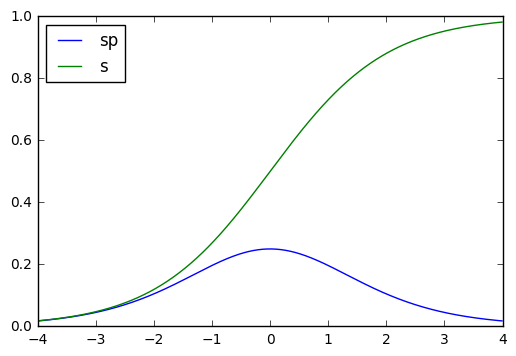

In [145]:
plot(np.arange(-4,4,0.01),fp(np.arange(-4,4,0.01)),label='sp')
plot(np.arange(-4,4,0.01),fs(np.arange(-4,4,0.01)),label='s')
pylab.legend(loc='upper left')

In [139]:
fs([1,2,3])

array([ 0.26894142,  0.11920292,  0.04742587])

In [154]:
j=T.jacobian(s1,x)
h=T.hessian(s,x)
fj=theano.function([x],j)
fh=theano.function([x],h)

In [151]:
fj([1,2,3])

array([[ 0.19661193,  0.        ,  0.        ],
       [ 0.        ,  0.10499359,  0.        ],
       [ 0.        ,  0.        ,  0.04517666]])

In [155]:
fh([1,2,3])

array([[-0.09085775, -0.        , -0.        ],
       [-0.        , -0.0799625 , -0.        ],
       [-0.        , -0.        , -0.04089157]])

In [158]:
J,updJ=theano.scan(lambda i,s1,x:T.grad(s1[i],x),sequences=T.arange(s1.shape[0]),non_sequences=[s1,x])
comJ=theano.function([x],J,updates=updJ)

In [159]:
comJ([1,2,3])

array([[ 0.19661193,  0.        ,  0.        ],
       [ 0.        ,  0.10499359,  0.        ],
       [ 0.        ,  0.        ,  0.04517666]])

In [177]:
H,updH=theano.scan(lambda i,ds,x:T.grad(ds[i],x),sequences=T.arange(ds.shape[0]),non_sequences=[ds,x])
comH=theano.function([x],H,updates=updH)

In [178]:
comH([1,2,3])

array([[-0.09085775, -0.        , -0.        ],
       [-0.        , -0.0799625 , -0.        ],
       [-0.        , -0.        , -0.04089157]])

In [7]:
w=T.matrix('w')
v=T.vector('v')
x=T.vector('x')
y=x.dot(w)
J=T.jacobian(y,x)
Jv=T.Rop(y,x,v)
jac=theano.function([x,w],J)
func=theano.function([w,v,x],Jv)
func1=theano.function([w,v,x],J.dot(v))

In [8]:
print jac([0,1],[[1, 1], [1, 1]] )
print func([[1, 1], [1, 1]], [2, 2], [0,1])
print func1([[1, 1], [1, 1]], [2, 2], [0,1])

[[ 1.  1.]
 [ 1.  1.]]
[ 4.  4.]
[ 4.  4.]


In [178]:
w=theano.shared(np.random.normal(0,1./2,size=2))

In [179]:
x=T.matrix('x')
y=T.vector('y')
pred=x.dot(w)
loss=((pred-y)**2).sum()
grad=T.grad(loss,w)
hess=T.hessian(loss,w)
step=theano.function([x,y],(theano.tensor.nlinalg.matrix_inverse(hess)).dot(grad))
step1=theano.function([x,y],(theano.tensor.nlinalg.matrix_inverse(hess)))
step2=theano.function([x,y],grad)
step3=theano.function([x,y],hess)
train=theano.function([x,y],loss,updates={w:w-1*(theano.tensor.nlinalg.matrix_inverse(hess)).dot(grad)})
predict=theano.function([x],pred)

In [1]:
import sklearn
from sklearn.datasets import make_regression,make_blobs,make_biclusters
from sklearn.metrics import accuracy_score

In [150]:
x_train,y_t=make_regression(n_samples=200,n_features=1,noise=10.0)

In [99]:
def appendbias(x):
    return np.array(map(lambda y:np.append(y,1),x))

In [151]:
x_t=appendbias(x_train)

In [180]:
for i in xrange(3):
    print train(x_t,y_t)

1392731.11787
20583.5245763
20583.5245763


In [126]:
predict(x_t[0:2])-y_t[0:2]

array([  4.44089210e-16,   0.00000000e+00])

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


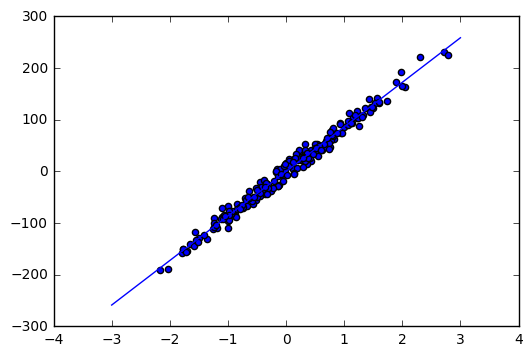

In [181]:
scatter(x_train,y_t)
plot(np.linspace(-3,3,1000),predict(appendbias(np.linspace(-3,3,1000))))

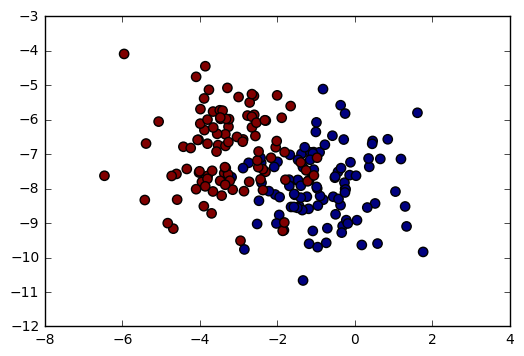

In [17]:
from sklearn.datasets import make_classification
x_t,y_train=make_blobs(n_samples=200,n_features=2,centers=2,shuffle=False)
y_t=2*y_train-1
scatter(x_t[:,0],x_t[:,1],c=y_t,s=45)

In [84]:
w=theano.shared(np.random.normal(0,1./2,size=2))

In [85]:
from theano.ifelse import ifelse
x=T.matrix('x')
y=T.vector('y')

prob=1/(1+T.exp(-x.dot(w)))
pred,upd=theano.scan(lambda xx,ww: ifelse( T.lt(0,xx.dot(ww)),1,-1 ),sequences=[x],non_sequences=[w])
loss=T.log(1+T.exp(-y*x.dot(w))).sum()
grad=T.grad(loss,w)
hess=T.hessian(loss,w)

train=theano.function([x,y],loss,updates={w:w-1*(theano.tensor.nlinalg.matrix_inverse(hess)).dot(grad)})
trainold=theano.function([x,y],loss,updates={w:w-10*grad})
predict_prob=theano.function([x],prob)
predict=theano.function([x],pred)

In [86]:
for i in xrange(20):
    trainold(x_t,y_t)
    print 'step:%d,acc: %f'%(i,accuracy_score(y_t,predict(x_t)))

step:0,acc: 0.500000
step:1,acc: 0.725000
step:2,acc: 0.500000
step:3,acc: 0.500000
step:4,acc: 0.500000
step:5,acc: 0.505000
step:6,acc: 0.535000
step:7,acc: 0.505000
step:8,acc: 0.575000
step:9,acc: 0.545000
step:10,acc: 0.590000
step:11,acc: 0.645000
step:12,acc: 0.720000
step:13,acc: 0.785000
step:14,acc: 0.845000
step:15,acc: 0.880000
step:16,acc: 0.890000
step:17,acc: 0.910000
step:18,acc: 0.910000
step:19,acc: 0.910000


In [87]:
accuracy_score(y_t,predict(x_t))

0.91000000000000003

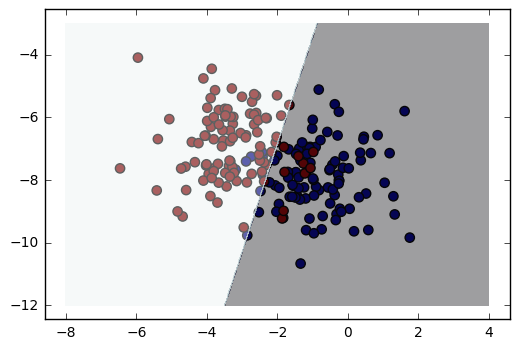

In [88]:
xx, yy = np.meshgrid(np.linspace(-8, 4, 500), np.linspace(-12, -3, 500))
Z = np.sign(predict(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
scatter(x_t[:,0],x_t[:,1],c=y_t,s=45)
contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.4)

In [194]:
from theano import tensor as T
from theano.ifelse import ifelse
import time

a,b = T.scalars('a', 'b')
x,y = T.matrices('x', 'y')
z_switch = T.switch(T.lt(a, b), T.mean(x), T.mean(y))
z_lazy = ifelse(T.lt( b,a), T.mean(x), T.mean(y))

f_switch = theano.function([a, b, x, y], z_switch)
f_lazyifelse = theano.function([a, b, x, y], z_lazy)

val1 = 0.
val2 = 1.
big_mat1 = np.ones((10000, 1000))
big_mat2 = np.ones((10000, 1000))

n_times = 10

tic = time.clock()
for i in range(n_times):
    f_switch(val1, val2, big_mat1, big_mat2)
print('time spent evaluating both values %f sec' % (time.clock() - tic))

tic = time.clock()
for i in range(n_times):
    f_lazyifelse(val1, val2, big_mat1, big_mat2)
print('time spent evaluating one value %f sec' % (time.clock() - tic))

time spent evaluating both values 0.447028 sec
time spent evaluating one value 0.231724 sec


In [83]:
# defining the tensor variables
X = T.matrix("X")
W = T.matrix("W")
b_sym = T.vector("b_sym")

results, updates = theano.scan(lambda v: T.tanh(T.dot(v, W) + b_sym), sequences=X)
compute_elementwise = theano.function(inputs=[X, W, b_sym], outputs=results,updates=updates)

# test values
x = np.eye(2, dtype=theano.config.floatX)
w = np.ones((2, 2), dtype=theano.config.floatX)
b = np.ones((2), dtype=theano.config.floatX)
b[1] = 2

print(compute_elementwise(x, w, b))

# comparison with numpy
print(np.tanh(x.dot(w) + b))

[[ 0.96402758  0.99505475]
 [ 0.96402758  0.99505475]]
[[ 0.96402758  0.99505475]
 [ 0.96402758  0.99505475]]


In [142]:
k = T.iscalar("k")
A = T.vector("A")

# Symbolic description of the result
result, updates = theano.scan(lambda prior_result, A: prior_result * A,
                              outputs_info=T.ones_like(A),
                              non_sequences=A,
                              n_steps=k)

# We only care about A**k, but scan has provided us with A**1 through A**k.
# Discard the values that we don't care about. Scan is smart enough to
# notice this and not waste memory saving them.
final_result = result[-1]

# compiled function that returns A**k
power = theano.function(inputs=[A,k], outputs=final_result, updates=updates)



In [90]:
# define tensor variables
X = T.vector("X")
W = T.matrix("W")
b_sym = T.vector("b_sym")
U = T.matrix("U")
Y = T.matrix("Y")
V = T.matrix("V")
P = T.matrix("P")

results, updates = theano.scan(lambda y, p, x_tm1: T.tanh(T.dot(x_tm1, W) + T.dot(y, U) + T.dot(p, V)),
          sequences=[Y, P[::-1]], outputs_info=[X])
compute_seq = theano.function(inputs=[X, W, Y, U, P, V], outputs=results)

# test values
x = np.zeros((2))
x[1] = 1
w = np.ones((2, 2))
y = np.ones((5, 2))
y[0, :] = -3
u = np.ones((2, 2))
p = np.ones((5, 2))
p[0, :] = 3
v = np.ones((2, 2))

print(compute_seq(x, w, y, u, p, v))

# comparison with numpy
x_res = np.zeros((5, 2))
x_res[0] = np.tanh(x.dot(w) + y[0].dot(u) + p[4].dot(v))
for i in range(1, 5):
    x_res[i] = np.tanh(x_res[i - 1].dot(w) + y[i].dot(u) + p[4-i].dot(v))
print(x_res)

[[-0.99505475 -0.99505475]
 [ 0.96471973  0.96471973]
 [ 0.99998585  0.99998585]
 [ 0.99998771  0.99998771]
 [ 1.          1.        ]]
[[-0.99505475 -0.99505475]
 [ 0.96471973  0.96471973]
 [ 0.99998585  0.99998585]
 [ 0.99998771  0.99998771]
 [ 1.          1.        ]]


In [143]:
%timeit power(range(10000),100)
%timeit np.arange(10000)**100

100 loops, best of 3: 9.47 ms per loop
1000 loops, best of 3: 1.51 ms per loop


In [180]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.

    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.

    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.

    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])

    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [203]:
x1,x2=T.vectors('x1','x2')
X=T.matrix()

train,update=theano.scan(lambda i,x:x[:,0]**i[0] * x[:,1]**i[1],sequences=[cartesian((np.arange(4),np.arange(4)))],non_sequences=[X])
com=theano.function([X],train.T)


In [273]:
cartesiansian((np.arange(9),np.arange(9)))

array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [0, 5],
       [0, 6],
       [0, 7],
       [0, 8],
       [1, 0],
       [1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [1, 5],
       [1, 6],
       [1, 7],
       [1, 8],
       [2, 0],
       [2, 1],
       [2, 2],
       [2, 3],
       [2, 4],
       [2, 5],
       [2, 6],
       [2, 7],
       [2, 8],
       [3, 0],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 6],
       [3, 7],
       [3, 8],
       [4, 0],
       [4, 1],
       [4, 2],
       [4, 3],
       [4, 4],
       [4, 5],
       [4, 6],
       [4, 7],
       [4, 8],
       [5, 0],
       [5, 1],
       [5, 2],
       [5, 3],
       [5, 4],
       [5, 5],
       [5, 6],
       [5, 7],
       [5, 8],
       [6, 0],
       [6, 1],
       [6, 2],
       [6, 3],
       [6, 4],
       [6, 5],
       [6, 6],
       [6, 7],
       [6, 8],
       [7, 0],
       [7, 1],
       [7, 2],
       [7,

In [207]:
com(x_t).shape

(200, 16)

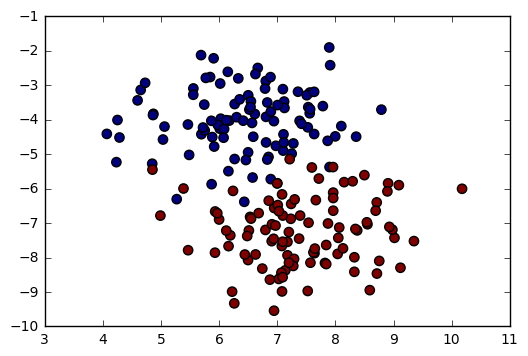

In [259]:
from sklearn.datasets import make_classification
x_t,y_train=make_blobs(n_samples=200,n_features=2,centers=2,shuffle=False)
y_t=2*y_train-1
scatter(x_t[:,0],x_t[:,1],c=y_t,s=45)

In [270]:
from theano.ifelse import ifelse
w=theano.shared(np.random.normal(0,1./81,size=81))
x1=T.matrix()
train,update=theano.scan(lambda i,xx:xx[:,0]**i[0] * xx[:,1]**i[1],sequences=[cartesian((np.arange(9),np.arange(9)))],non_sequences=[x1])
x=train.T
y=T.vector('y')

prob=1/(1+T.exp(-x.dot(w)))
pred,upd=theano.scan(lambda xx,ww: ifelse( T.lt(0,xx.dot(ww)),1,-1 ),sequences=[x],non_sequences=[w])
loss=T.log(1+T.exp(-y*x.dot(w))).sum()
grad=T.grad(loss,w)
hess=T.hessian(loss,w)

train=theano.function([x1,y],loss,updates={w:w-0.4*(theano.tensor.nlinalg.matrix_inverse(hess)).dot(grad)})
trainold=theano.function([x1,y],loss,updates={w:w-1000./x1.shape[0]*grad})
predict_prob=theano.function([x1],prob)
predict=theano.function([x1],pred)

In [271]:
for i in xrange(2000):
    trainold(x_t,y_t)
    #print 'step:%d,acc: %f'%(i,accuracy_score(y_t,predict(x_t)))

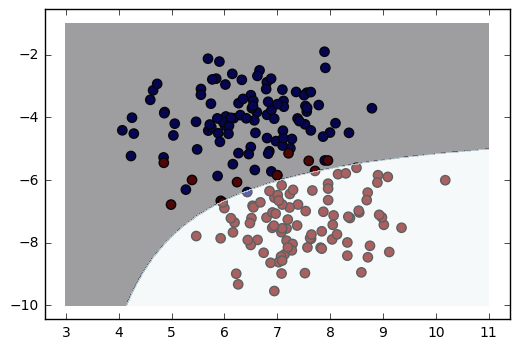

In [272]:
xx, yy = np.meshgrid(np.linspace(3,11, 500), np.linspace(-10, -1, 500))
Z = np.sign(predict(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
scatter(x_t[:,0],x_t[:,1],c=y_t,s=45)
contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.4)

In [274]:
accuracy_score(y_t,predict(x_t))

0.94499999999999995